# K-Nearest Neighbors Classifier

### Import library required
Librari yang digunakan adalah **pandas, numpy, matplotlib, seaborn, dan sklearn**. Silahkan install terlebih dahulu jika belum menginstallnya dengan perintah `pip install nama-library`.

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

### Load Data
Data yang digunakan adalah data bawaan sklearn library. Jika ingin menggunakan data sendiri silahkan pakai perintah `pd.read_csv()` atau `pd.read_excel()`

In [2]:
data = load_wine(as_frame=True)
data.frame

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### Split Data
Fungsi `train_test_split`, secara default akan membagi data menjadi 75% data training dan 25% data test. Untuk mengaturnya dapat menggunakan argument `test_size` atau `train_size`. Contoh `train_test_split(X, y, train_test = 0.8)`

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  133  | Jumlah Test Data :  45


### Scale Features to Minimize Computation

In [6]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### Make Model

In [7]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(X_train, y_train)
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

### Predict Test Set with that Model

In [8]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1])

### Check Accuracy

In [9]:
print('Accuracy: ', clf.score(X_test, y_test))

Accuracy:  0.9777777777777777


### Make Confusion Matrix

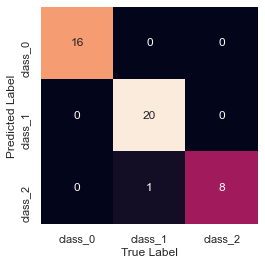

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm.T, annot=True, square=True, xticklabels=data.target_names, fmt='d',
           yticklabels=data.target_names, cbar=False)

plt.xlabel('True Label')
plt.ylabel('Predicted Label');

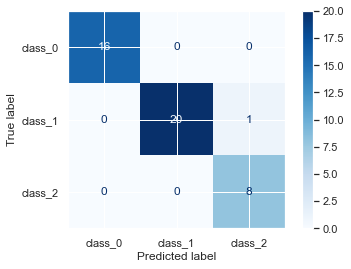

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, display_labels=data.target_names, cmap='Blues');